In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [50]:
bs_results = []
bs_result_path = 'data/bs_result/bs_result_'


for i in range(1, 7):
    dim_result = pd.read_csv(bs_result_path + str(i) + ' (1).csv')
    
    
    CIs = np.percentile(dim_result, [2.5, 97.5], axis=0)
    means = np.mean(dim_result, axis=0)
    bs_result = pd.DataFrame({'mean': means, 'lower': CIs[0], 'upper': CIs[1]})
    bs_results.append(bs_result)
    
dim_result

,latte,pika,vgen,gen2,videocrafter2
0,0.922603,1.344840,0.828560,2.929174,0.955768
1,0.934014,1.341830,0.808807,2.974026,0.941891
2,0.910424,1.278134,0.792774,2.956201,0.960407
3,0.939398,1.378499,0.831189,2.936896,0.948567
4,0.918021,1.360611,0.836079,2.949225,0.947326
...,...,...,...,...,...
995,0.963116,1.155464,0.828516,2.811527,0.823483
996,0.950499,1.135041,0.840545,2.688901,0.847280
997,0.872499,1.148557,0.938611,3.059695,0.700565
998,0.975422,1.161597,0.884993,2.484322,0.836666


In [51]:
dim_result.rename(columns={'latte': 'Latte', 'pika': 'Pika', 'vgen':'TF-T2V', 'gen2': 'Gen2', 'videocrafter2':'Videocrafter2'}, inplace=True)
dim_result

,Latte,Pika,TF-T2V,Gen2,Videocrafter2
0,0.922603,1.344840,0.828560,2.929174,0.955768
1,0.934014,1.341830,0.808807,2.974026,0.941891
2,0.910424,1.278134,0.792774,2.956201,0.960407
3,0.939398,1.378499,0.831189,2.936896,0.948567
4,0.918021,1.360611,0.836079,2.949225,0.947326
...,...,...,...,...,...
995,0.963116,1.155464,0.828516,2.811527,0.823483
996,0.950499,1.135041,0.840545,2.688901,0.847280
997,0.872499,1.148557,0.938611,3.059695,0.700565
998,0.975422,1.161597,0.884993,2.484322,0.836666


In [52]:
df_bs_result = pd.DataFrame(columns=['dimension', 'model', 'estimation'])

for i in range(1, 7):
    dim_result = pd.read_csv(bs_result_path + str(i) + ' (1).csv')
    dim_result.rename(columns={'latte': 'Latte', 'pika': 'Pika', 
                               'vgen':'TF-T2V', 'gen2': 'Gen2', 
                               'videocrafter2':'Videocrafter2'}, inplace=True)
    dim_result = dim_result.melt(var_name='model', value_name='estimation')
    dim_result['dimension'] = i
    df_bs_result = pd.concat([df_bs_result, dim_result])
    
df_bs_result

/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_44744/2008584163.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_bs_result = pd.concat([df_bs_result, dim_result])


,dimension,model,estimation
0,1,Gen2,3.022970
1,1,Gen2,2.893725
2,1,Gen2,2.960195
3,1,Gen2,3.033197
4,1,Gen2,3.178791
...,...,...,...
4995,6,Videocrafter2,0.823483
4996,6,Videocrafter2,0.847280
4997,6,Videocrafter2,0.700565
4998,6,Videocrafter2,0.836666


In [53]:
dimension_names = {
    1: "Video Quality",
    2: "Temporal Quality",
    3: "Motion Quality",
    4: "Text Alignment",
    5: "Ethical Robustness",
    6: "Human Preference"
}

df_bs_result['dimension'] = df_bs_result['dimension'].map(dimension_names)

In [12]:
from pyperclip import copy
copy(df_bs_result.head().to_latex(index=False))

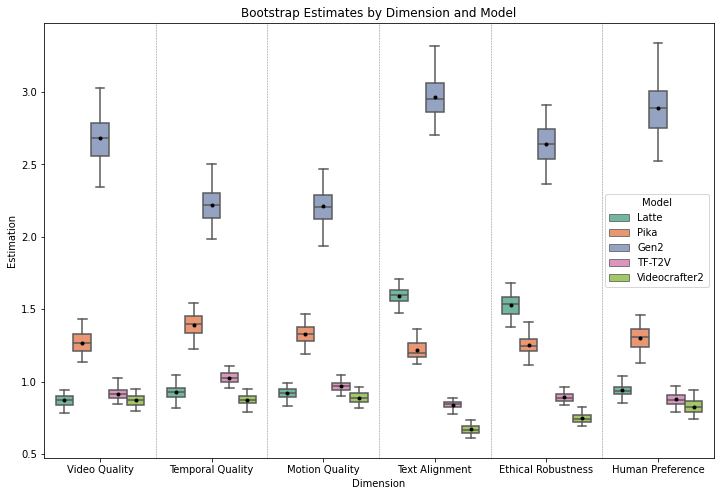

In [57]:
# 使用 seaborn 的 boxplot 函数绘制箱型图
model_order = ['Latte', 'Pika', 'Gen2', 'TF-T2V', 'Videocrafter2']
plt.figure(figsize=(12, 8))  # 设置图形大小
ax = sns.boxplot(x='dimension', y='estimation', hue='model', hue_order=model_order,
            data=df_bs_result, whis=[2.5, 97.5], showmeans=True, 
            meanprops={'marker': 'o', 'markerfacecolor': 
                'black', 'markeredgecolor': 'black',
                'markersize':3}, palette='Set2',
            showfliers=False)  # 创建箱型图

x_ticks = ax.get_xticks()

# 在不同的 dimension 之间添加竖线
for tick in x_ticks[1:]:  # 从第二个刻度开始画线，以避免在最左侧添加线
    plt.axvline(x=tick - 0.5, color='grey', linestyle='--', lw=0.5)

# 添加一些图形格式化选项
plt.title('Bootstrap Estimates by Dimension and Model')  # 设置标题
plt.xlabel('Dimension')  # 设置X轴标签
plt.ylabel('Estimation')  # 设置Y轴标签
plt.legend(title='Model')  # 设置图例标题
# plt.grid(True)  # 添加网格线
plt.savefig('figures/bs_result.pdf')
# 展示图形
plt.show()
#save fig as pdf


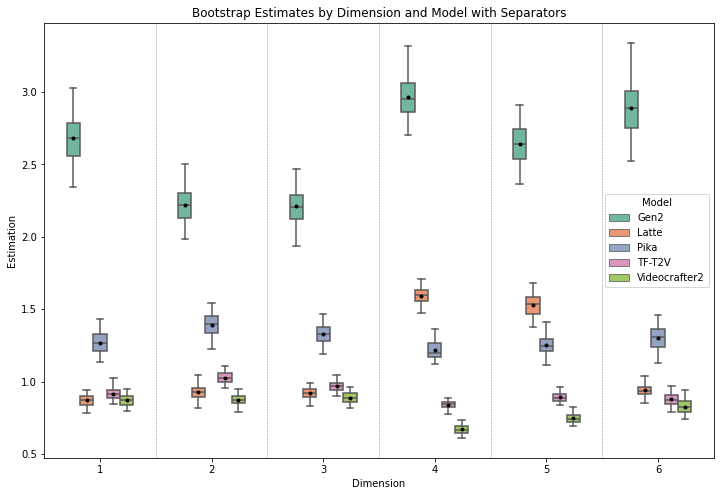

In [46]:
# 假设 df_bs_result 是你的 DataFrame，包含了相应的数据

# 使用 seaborn 的 boxplot 函数绘制箱型图
plt.figure(figsize=(12, 8))  # 设置图形大小
ax = sns.boxplot(x='dimension', y='estimation', hue='model', 
                 data=df_bs_result, whis=[2.5, 97.5], showmeans=True, 
                 meanprops={'marker': 'o', 'markerfacecolor': 'black', 
                            'markeredgecolor': 'black', 'markersize': 3},
                 palette='Set2', width=0.6,  # 控制箱子的宽度
                 showfliers=False)  # 创建箱型图

# 获取当前图的X轴信息
x_ticks = ax.get_xticks()

# 在不同的 dimension 之间添加竖线
for tick in x_ticks[1:]:  # 从第二个刻度开始画线，以避免在最左侧添加线
    plt.axvline(x=tick - 0.5, color='grey', linestyle='--', lw=0.5)

# 添加一些图形格式化选项
plt.title('Bootstrap Estimates by Dimension and Model with Separators')  # 设置标题
plt.xlabel('Dimension')  # 设置X轴标签
plt.ylabel('Estimation')  # 设置Y轴标签
plt.legend(title='Model')  # 设置图例标题

# 展示图形
plt.show()


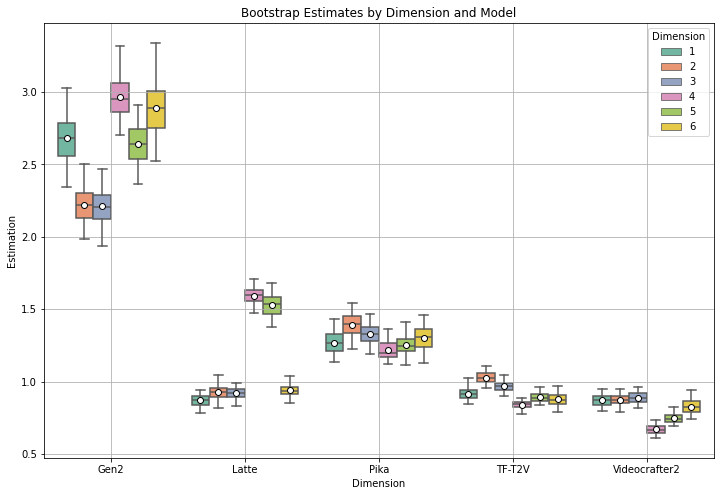

In [24]:
# 使用 seaborn 的 boxplot 函数绘制箱型图
plt.figure(figsize=(12, 8))  # 设置图形大小
sns.boxplot(x='model', y='estimation', hue='dimension', 
            data=df_bs_result, whis=[2.5, 97.5], showmeans=True, 
            meanprops={'marker': 'o', 
                       'markerfacecolor': 'white', 
                       'markeredgecolor': 'black'}, palette='Set2',
            showfliers=False)

# 添加一些图形格式化选项
plt.title('Bootstrap Estimates by Dimension and Model')  # 设置标题
plt.xlabel('Dimension')  # 设置X轴标签
plt.ylabel('Estimation')  # 设置Y轴标签
plt.legend(title='Dimension')  # 设置图例标题
plt.grid(True)  # 添加网格线

# 展示图形
plt.show()